<a href="https://colab.research.google.com/github/bhkwon89/Section1_project/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야 합니다  
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야 합니다  
출고량의 높은 게임에 대한 분석 및 시각화 프로세스 가 포함되어야 합니다  

In [397]:
# 구글 드라이브 연동
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [398]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [399]:
# 여러줄 출력용 라이브러리 호출
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('gdrive/MyDrive/vgames2.csv', index_col=0)

df.head(5)

print('\n행 갯수 = ' ,len(df))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04



행 갯수 =  16598


In [401]:
# 결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [402]:
# 중복 값 확인
df.duplicated().sum()
df[df.duplicated()]

1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [403]:
# 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [404]:
# 중복 값이 있어 제거
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

print('\n행 갯수 = ' ,len(df))


행 갯수 =  16597


In [407]:
print('결측치 제외 게임제목 종류 = ', df['Name'].nunique())
print()
print('=========== 각 게임제목 별 개수 ========= \n', df['Name'].value_counts())

df['Name'].unique()

df[df['Name'] == 'Ratatouille']

결측치 제외 게임제목 종류 =  11493

=========== 각 게임제목 별 개수 ========= 
 Need for Speed: Most Wanted            12
Ratatouille                             9
FIFA 14                                 9
LEGO Marvel Super Heroes                9
Madden NFL 07                           9
                                       ..
Road Rash 3D                            1
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64


array(["Candace Kane's Candy Factory", 'The Munchables',
       'Otome wa Oanesama Boku ni Koi Shiteru Portable', ...,
       'White Album: Tsuzurareru Fuyu no Omoide', 'Minna no Chizu 2',
       'Rainbow Islands: Revolution'], dtype=object)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4039,Ratatouille,GBA,2007.0,Action,THQ,0.14,0.05,0,0
5839,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.28,0,0.16
7629,Ratatouille,Wii,2007.0,Action,THQ,0.44,0.04,0,0.04
10484,Ratatouille,GC,2007.0,Action,THQ,0.11,0.03,0,0K
11195,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0,0.11
11544,Ratatouille,PS2,2007.0,Action,THQ,0.31,0,0,0.53
11560,Ratatouille,X360,2007.0,Action,THQ,0.23,0.02,0,0.02
14649,Ratatouille,DS,2007.0,Action,THQ,0.5,0.62,0,0.14
16342,Ratatouille,PC,2007.0,Action,THQ,0.01,0.01,0,0


이름이 중복되는 것들이 몇개 있음

In [408]:
# 편하게 보기 위해 이름순으로 정렬

df.sort_values(by=['Name'], axis=0, inplace=True)
df = df.reset_index(drop=True)

print('이름이 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name'], keep=False )]))
print('이름과 플랫폼이 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name', 'Platform'], keep=False )]))
df[df.duplicated( subset=['Name', 'Platform'], keep=False )]


이름이 중복되는 게임 수  7878
이름과 플랫폼이 중복되는 게임 수  8


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7715,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
7716,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
9622,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
9623,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
9628,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
9631,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
12704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66
12706,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0


In [347]:
print('이름이 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name'], keep=False )]))
print('이름과 배포사가 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name', 'Publisher'], keep=False )]))


이름이 중복되는 게임 수  7878
이름과 배포사가 중복되는 게임 수  7235


In [348]:
print('이름이 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name'], keep=False )]))
print('이름과 장르가 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name', 'Genre'], keep=False )]))

이름이 중복되는 게임 수  7878
이름과 장르가 중복되는 게임 수  7848


In [349]:
print('이름이 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name'], keep=False )]))
print('이름과 출시연도가 중복되는 게임 수 ', len(df[df.duplicated( subset=['Name', 'Year'], keep=False )]))

이름이 중복되는 게임 수  7878
이름과 출시연도가 중복되는 게임 수  6502


In [350]:
# 같은 게임이더라도 플랫폼이 다를 수 있으니 이름이 중복인 것은 문제가 없음.

# 가정
1. **이름이 같으면 장르는 똑같다**  
2. **플랫폼이 다르면 퍼블리셔도 다를 수 있다**
3. **이름이 같아도 플랫폼에 따라 출시연도가 다를 수 있다**

가정 1을 통해 a 행, b 행의 이름이 같은데 a 행에는 장르가 nan이고 b행에는 장르가 존재할 때 a행의 장르를 b행의 장르로 채울 수 있다    


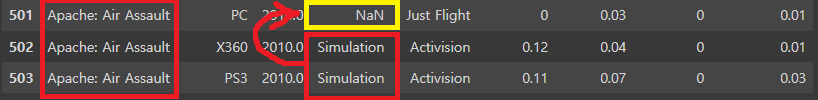


In [351]:

print('결측치 제외 장르의 종류 = ', df['Genre'].nunique())
print()
print('=========== 각 장르별 제품 개수 ========= \n', df['Genre'].value_counts())


결측치 제외 장르의 종류 =  12

=========== 각 장르별 제품 개수 ========= 
 Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64


In [352]:
df[df['Name'] == 'Apache: Air Assault'	]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
501,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01
502,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
503,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03


In [353]:
# 장르가 null인 게임 중에 같은 이름을 같는 행이 있는지 확인
genre_null = df[df['Genre'].isna()]['Name']


# 장르가 null인 게임만 모아둔 dataframe
df_genre_null = pd.DataFrame(genre_null )


dup_cnt = []
for name in df[df['Genre'].isna()]['Name']:
  dup_cnt.append(df[df['Name'] == name]['Name'].count())

df_genre_null['dup_cnt'] = dup_cnt
df_genre_null['Genre'] = ''


for idx, row in df_genre_null.iterrows():
  if row.dup_cnt > 1:
    for Genre in df[df['Name'] == row.Name]['Genre']:                            # 장르가 null인 게임 중 같은 이름인 행을 찾음
      if Genre in df['Genre'].unique():                                          # 찾은 행의 장르가 Null이 아닐 경우 저장 ( == 찾은 행의 장르가 unique 값 중 하나 일 경우)
        for z in df.index[df['Genre'].isna() & (df['Name'] == row.Name)].tolist():
          df.loc[z, 'Genre'] = Genre
 
df.isna().sum()

Name             0
Platform         0
Year           270
Genre           30
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [354]:
# 위의 방식으로 채운 결과 50 -> 30으로 결측값이 줄음, 아래는 확인용
df[df['Name'] == 'Apache: Air Assault'	]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
501,Apache: Air Assault,PC,2010.0,Simulation,Just Flight,0,0.03,0,0.01
502,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
503,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03


In [355]:
# 장르 종류는 결측치 제외 총 12개
# 장르의 결측치는 총 50개로 

print('출시연도 개수 = ', df['Year'].nunique())
print()
print('=========== 각 출시연도별 제품 개수 ========= \n', df['Year'].value_counts())
print()
print('======== 출시연도 =======  \n',df['Year'].value_counts().index)

출시연도 개수 =  62

=========== 각 출시연도별 제품 개수 ========= 
 2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
97.0         2
13.0         2
2020.0       1
86.0         1
94.0         1
Name: Year, Length: 62, dtype: int64

======== 출시연도 =======  
 Float64Index([2009.0, 2008.0, 2010.0, 2007.0, 2011.0, 2006.0, 2005.0, 2002.0,
              2003.0, 2004.0, 2012.0, 2015.0, 2014.0, 2013.0, 2001.0, 1998.0,
              2000.0, 2016.0, 1999.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0,
              1981.0, 1992.0, 1991.0, 1982.0, 1986.0, 1983.0, 1989.0, 1987.0,
              1990.0, 1988.0, 1985.0, 1984.0,   11.0,    8.0,    9.0, 1980.0,
                 3.0,    6.0,   10.0,   15.0,   16.0,    5.0,    4.0,   95.0,
                 7.0, 2017.0,   96.0,    2.0,   98.0,    0.0,   14.0,    1.0,
                12.0,   97.0,   13.0, 2020.0,   86.0,   94.0],
             dtype='float64')


출시연도에 2자리만 넣은 경우가 있어 4자리로 변경

In [356]:
for i in range(len(df)):
  if df['Year'][i] / 1900 < 1:
    if df['Year'][i] / 80.0  > 1:
      df['Year'][i] = df['Year'][i] + 1900
    else:
      df['Year'][i] = df['Year'][i] + 2000

print('출시연도 개수 = ', df['Year'].nunique())
print()
print('=========== 각 출시연도별 제품 개수 ========= \n', df['Year'].value_counts())
print()
print('======== 출시연도 =======  \n',df['Year'].value_counts().index)

출시연도 개수 =  39

=========== 각 출시연도별 제품 개수 ========= 
 2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

======== 출시연도 =======  
 Float64Index([2009.0, 2008.0, 2010.0, 2007.0, 2011.0, 2006.0, 2005.0, 2002.0,
              2003.0, 2004.0, 2012.0, 2015.0, 2014.0, 2013.0, 2001.0, 1998.0,
              2000.0, 2016.0, 1999.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0,
              1981.0, 1992.0, 1991.0, 1982.0, 1986.0, 1983.0, 1989.0, 1987.0,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [357]:
# 출시년도 결측값을 채워넣을 방법.
# 연도 컬럼이 비어있는데 제목에 연도가 포함되어 있고 스포츠 장르일 경우 이름에 있는 연도로 채워 넣는다.

# 스포츠 장르는 이름에 출시년도를 집어넣는 경우가 있다. (NBA 2K22, FIFA 21) 단 대부분 1년 미리 출시 한다. 
# 그외의 장르에는 적용하기 어렵다. ( 1945, Anno1800 등등 )

from datetime import datetime

df_year_null = df[(df['Year'].isna()) & (df['Genre'] == 'Sports')]
df_year_null = df_year_null.reset_index()

for i in range(len(df_year_null)):
  tmp_year = ''
  for c in df_year_null.loc[i, 'Name']:
    if c.isdigit() | ((len(tmp_year) == 1) & (c == 'K')):
      if len(tmp_year) == 5:
        continue
      tmp_year = tmp_year + c
  
  if 'K' in tmp_year:
    thousands, ten= tmp_year.split(sep='K')
    if thousands.isdigit() and ten.isdigit():
      if thousands == '2':
        tmp_year = 2000 + int(ten)
        
        for z in df.index[df['Year'].isna() & (df['Name'] == df_year_null.loc[i, 'Name'])].tolist():
          #df.loc[z:,:]
          df.loc[z, 'Year'] = tmp_year -1
          
      else:
        continue
    else:
      continue

  else:
    if tmp_year.isdigit():
      if len(tmp_year) == 2:
        if ( int(tmp_year) / ( int(datetime.today().year) - 2000 ) )  < 1:
          tmp_year = '20' + tmp_year
        else:
          tmp_year = '19' + tmp_year

      tmp_year = int(tmp_year)
      if int(tmp_year / 1980) == 1:
        for z in df.index[df['Year'].isna() & (df['Name'] == df_year_null.loc[i, 'Name'])].tolist():
          df.loc[z, 'Year'] = tmp_year - 1
          #df.loc[z, :]
      else:
        continue

df.isna().sum()


Name             0
Platform         0
Year           249
Genre           30
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

# Year, Genre 결측치 채우기 결과   
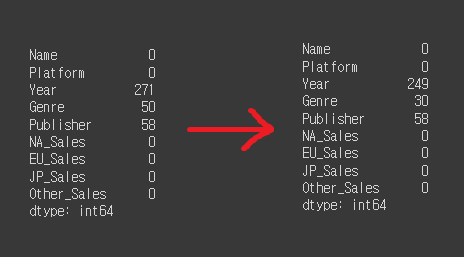

In [358]:
df[df['Publisher'] == 'Unknown']['Publisher'].count()

# 퍼블리셔에는 결측값과 별개로 Unknown이 존재 (203개)

203

In [359]:
df['Publisher'] = df['Publisher'].fillna('Unknwon')
df.isna().sum()

# 퍼블리셔의 경우 mission 내용에 큰 영향을 미칠 것 같지 않아 Unknwon으로 채운다.

Name             0
Platform         0
Year           249
Genre           30
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [360]:
# NA_Sales	EU_Sales	JP_Sales	Other_Sales
print(df['NA_Sales'].str.contains('M').sum())
print(df['NA_Sales'].str.contains('m').sum())
print(df['NA_Sales'].str.contains('K').sum())
print(df['NA_Sales'].str.contains('k').sum())
print(df['NA_Sales'].str.contains('u').sum())
df[df['NA_Sales'].str.contains('M')]
df[df['NA_Sales'].str.contains('K')]

100
0
100
0
0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
188,Ace Combat X: Skies of Deception,PSP,2006.0,Simulation,Namco Bandai Games,0.37M,0.31,0.12,0.19
341,Alien: Isolation,XOne,2014.0,Shooter,Sega,0.22M,0.24,0,0.04
553,Archer Maclean Presents: Pool Paradise,GC,2004.0,Sports,Ignition Entertainment,0.02M,0.01,0,0
1458,Bottom of the 9th,PS,1996.0,Sports,Konami Digital Entertainment,0.08M,0.05,0,0.01
1487,Bratz Ponyz,DS,2007.0,Adventure,Game Factory,0.26M,0,0,0.02
...,...,...,...,...,...,...,...,...,...
15881,Wedding Planner: Dream Weddings Guaranteed,DS,2010.0,Simulation,DTP Entertainment,0M,0.01,0,0
16339,Yarudora Series Vol.1: Double Cast,PS,1998.0,Adventure,Sony Computer Entertainment,0M,0,0.35,0.02
16453,Yuki Yuna is a Hero: Memory of the Forest,PSV,2015.0,Action,FuRyu,0M,0,0.04,0
16463,Yuusha no Kuse ni Namaikida Or 3D,PSP,2010.0,Strategy,Sony Computer Entertainment,0M,0,0.11,0


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
233,Adventures of Lolo,NES,1989.0,Puzzle,HAL Laboratory,60K,0,0,0
483,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
777,Away: Shuffle Dungeon,DS,2008.0,Role-Playing,Majesco Entertainment,20K,0,0,0
1307,Blazing Souls: Accelate,PSP,2009.0,Role-Playing,Idea Factory,40K,0,0.01,0
1353,Blood of Bahamut,DS,2009.0,Role-Playing,Square Enix,0K,0,0.09,0
...,...,...,...,...,...,...,...,...,...
16070,Woody Woodpecker Racing,PS,1999.0,Racing,Konami Digital Entertainment,60K,0.04,0,0.01
16111,World Poker Tour,PSP,2006.0,Misc,Take-Two Interactive,40K,0,0,0
16115,World Series Baseball,XB,2002.0,Sports,Sega,170K,0.05,0,0.01
16286,XI Coliseum,PSP,2006.0,Puzzle,Sony Computer Entertainment,0K,0,0.01,0


In [361]:
# 데이터 정황상 기본단위는 M(밀리언)으로 보인다.

df.NA_Sales = df.NA_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.NA_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [0.001, 1]).astype(int)
df.EU_Sales = df.EU_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.EU_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [0.001, 1]).astype(int)
df.JP_Sales = df.JP_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.JP_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [0.001, 1]).astype(int)
df.Other_Sales = df.Other_Sales.replace(r'[KM]+$', '', regex=True).astype(float) * df.Other_Sales.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [0.001, 1]).astype(int)



In [362]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16348.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,2006.403903,0.262415,0.145726,0.077326,0.047833
std,5.826471,0.814492,0.504633,0.308487,0.188513
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [363]:
# 이외의 결측값은 제거한다.
df.dropna(axis=0, inplace=True)
df.isna().sum()

df['Year'] = df['Year'].astype('int')
df.info()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16318 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16318 non-null  object 
 1   Platform     16318 non-null  object 
 2   Year         16318 non-null  int64  
 3   Genre        16318 non-null  object 
 4   Publisher    16318 non-null  object 
 5   NA_Sales     16318 non-null  float64
 6   EU_Sales     16318 non-null  float64
 7   JP_Sales     16318 non-null  float64
 8   Other_Sales  16318 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [364]:

df_tidy = df.melt(id_vars = 'Genre', value_vars = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'])
df_tmp = df_tidy.groupby([ 'variable', 'Genre']).sum().reset_index()
tmp_sum = df_tmp.groupby([ 'variable']).sum()


<Figure size 1296x288 with 0 Axes>

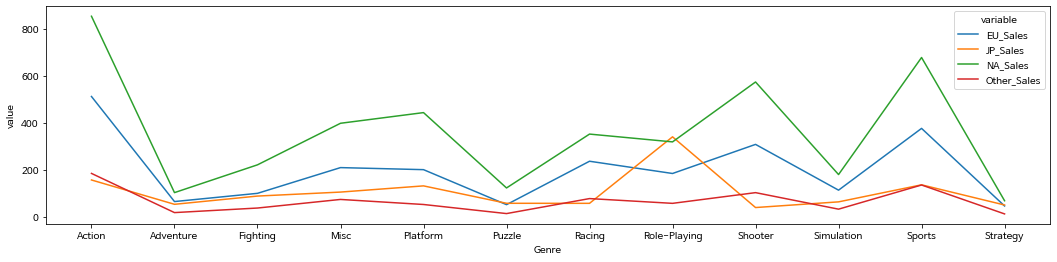

In [365]:
import seaborn as sns

plt.figure(figsize=(18,4))
sns.lineplot(x = 'Genre', y = 'value',hue = 'variable',   data = df_tmp)



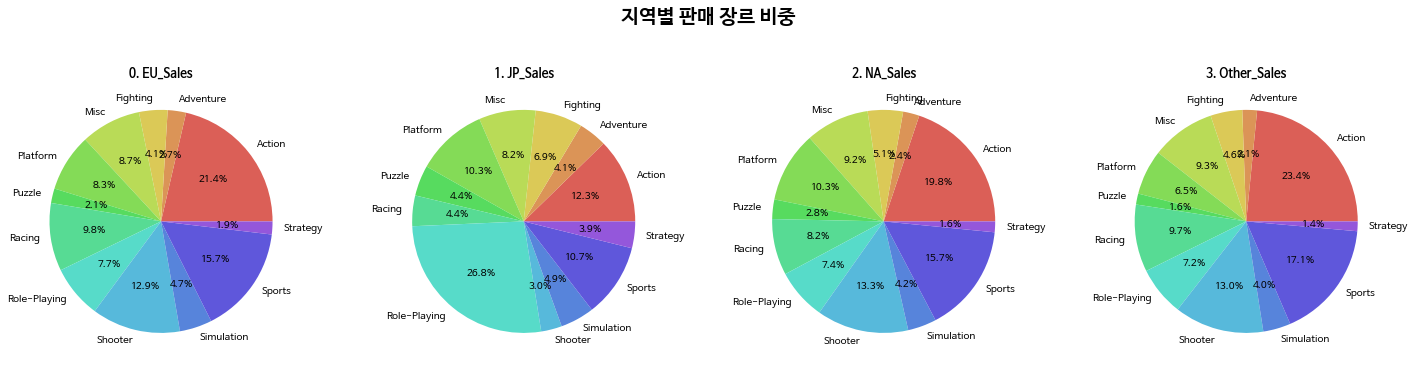

In [366]:
wide_tmp = df_tmp.pivot_table(index = 'variable', columns = 'Genre', values = 'value')
#wide_tmp

color = (sns.color_palette('hls', int(len(wide_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_tmp.columns, color[:len(wide_tmp.columns)]))



fig,ax=plt.subplots(1,4, figsize=(20,5), constrained_layout=True)

for j in range(4):
  
  tmp = ax[j].pie(wide_tmp.iloc[j, :], labels=wide_tmp.columns, colors = [dict_color[key] for key in wide_tmp.columns], autopct='%.1f%%')
  tmp = ax[j].set_title( str(j) + '. ' + str(wide_tmp.index[j]), fontweight ="bold")

tmp = fig.suptitle('지역별 판매 장르 비중\n', fontsize=20, fontweight ="bold")


plt.show()

In [367]:
# mission 1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야 합니다
# 그림만으로 보면 지역에 따라 선호하는 장르가 달라보인다
# 확실하게 따지기 위해 카이제곱 검정을 실시

#df_tmp


wide_tmp = df_tmp.pivot_table(index = 'Genre', columns = 'variable', values = 'value')
#wide_tmp

from scipy.stats import chi2_contingency

# 귀무가설 : 게임 판매량에 지역과 장르는 관련성이 없다
# 대안가설 : 게임 판매량에 지역과 장르는 관련성이 있다

chi2_val, p, dof, expected= chi2_contingency(wide_tmp, correction=False)


if(p<0.05) : 
    print('p value :', p,"\n"+'대안가설 채택. 게임 판매량에 지역과 장르는 관련성이 있다')
else :
    print('p value :', p,"\n"+'귀무가설 채택. 게임 판매량에 지역과 장르는 관련성이 없다')


p value : 1.1407607506804608e-121 
대안가설 채택. 게임 판매량에 지역과 장르는 관련성이 있다


In [368]:
# mission 2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야 합니다
# 게임 트렌드를 플랫폼, 장르라 가정하고 진행.
# A. 출시년도에 따른 플랫폼별 판매량
# B. 출시년도에 따른 장르별 판매량


# A. 출시년도에 따른 플랫폼별 판매량
df_yearplat = df.melt(id_vars = ['Year','Platform'], value_vars = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'])
df_yearplat_tmp = df_yearplat.groupby([ 'Year','Platform']).sum().reset_index()

df_yearplat_tmp


,Year,Platform,value
0,1980,2600,11.38
1,1981,2600,35.57
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96
...,...,...,...
236,2016,X360,0.83
237,2016,XOne,12.38
238,2017,PS4,0.03
239,2017,PSV,0.02


In [369]:
# 그래프 그리기용 팔레트

tmp_p = np.sort(df['Platform'].unique())
color = (sns.color_palette('hls', int(len(df['Platform'].unique())*1.3)).as_hex())
dict_color = dict(zip(tmp_p, color[:len(df['Platform'].unique())]))

<Figure size 1296x288 with 0 Axes>

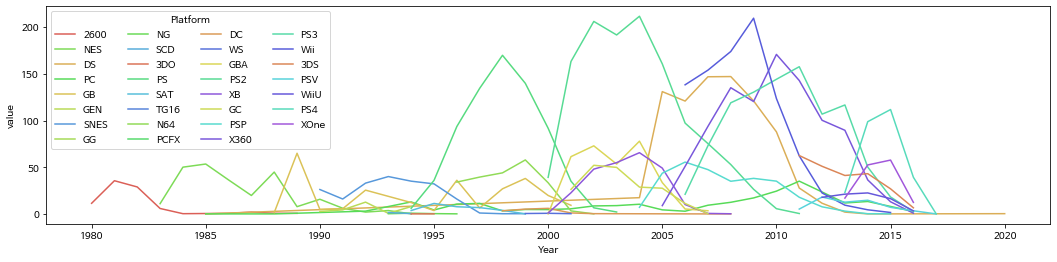

In [370]:

plt.figure(figsize=(18,4))
ax = sns.lineplot(x = 'Year', y = 'value',hue = 'Platform',  palette=dict_color ,  data = df_yearplat_tmp)

ax.legend(loc='upper left',ncol=4, title="Platform")

In [371]:
wide_yearplat_tmp = df_yearplat_tmp.pivot_table(index = 'Year', columns = 'Platform', values = 'value')
wide_yearplat_tmp.fillna(0, inplace=True)

from scipy.stats import chi2_contingency

# 귀무가설 : 출시년도와 플랫폼별 판매량은 관련성이 있다
# 대안가설 : 출시년도와 플랫폼별 판매량은 관련성이 없다

chi2_val, p, dof, expected= chi2_contingency(wide_yearplat_tmp, correction=False)

#chi2_contingency(wide_yearplat_tmp, correction=False)


if(p<0.05) : 
    print('p value :', p,"\n"+'대안가설 채택. 출시년도와 플랫폼별 판매량은 관련성이 있다')
else :
    print('p value :', p,"\n"+'귀무가설 채택. 출시년도와 플랫폼별 판매량은 관련성이 없다')

p value : 0.0 
대안가설 채택. 출시년도와 플랫폼별 판매량은 관련성이 있다


In [372]:
# 출시년도에 따른 플랫폼 트렌드
df_rank = pd.DataFrame()
df_rank.index = wide_yearplat_tmp.index
#wide_yearplat_tmp


def wide2rank(df):


  
  list_rank = []
  
  df.index = pd.to_datetime(df.index, format='%Y')
  df = df.resample('5Y').sum()              # 5년 단위 합
  
  for idx, rows in df.rank(method='min', ascending=False, axis=1).iterrows():
    tmp = []
    
    for count in range(6):
      dup = 1
      for column in df.columns:
        if rows[column] == count:
          if dup == 4:          # 판매량이 같은 것이 4개 이상 중복일 순 없다라고 가정
            tmp[-3:] = ['-'] * 3
            tmp.append('-')
            break
          else:
            tmp.append(column)
            dup = dup + 1
    
    tmp = tmp[:5]
    list_rank.append(tmp)
  df_rank = pd.DataFrame(list_rank, columns =['1st', '2nd', '3rd', '4th', '5th'])
  df_rank.index = df.index
  df_rank = df_rank.T

  df_rank.columns = ['~80', '81~85', '86~90', '91~95', '96~00', '01~05','06~10', '11~15', '16~20']
  
  return df_rank


#wide_yearplat_tmp.index = pd.to_datetime(wide_yearplat_tmp.index, format='%Y')


#wide_yearplat_tmp.resample('5Y').sum()
df_rank = wide2rank(wide_yearplat_tmp)

In [373]:


color = (sns.color_palette('hls', int(len(wide_yearplat_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_yearplat_tmp.columns, color[:len(wide_yearplat_tmp.columns)]))

def highlight_cols(cell_value):

    if cell_value == '-':
        return ''

    highlight = 'background-color: ' + dict_color[cell_value]
    return highlight

df_rank.style.set_properties(**{'background-color': 'gray',
                           'color': 'black'}).applymap(highlight_cols).set_table_attributes('class="dataframe"')


,~80,81~85,86~90,91~95,96~00,01~05,06~10,11~15,16~20
1st,2600,NES,NES,SNES,PS,PS2,Wii,PS3,PS4
2nd,-,2600,GB,GB,N64,GBA,DS,X360,XOne
3rd,-,PC,SNES,PS,GB,XB,X360,PS4,3DS
4th,-,DS,2600,GEN,PS2,GC,PS3,3DS,PSV
5th,-,-,GEN,PC,PC,DS,PS2,XOne,WiiU


In [374]:
# 플랫폼 트랜드
# ~1980     : 2600 (아타리2600)
# 1981~1985 : NES  (패미컴 = 닌텐도 엔터테이먼트 시스템)
# 1986~1990 : NES  
# 1991~1995 : SNES (슈퍼패미컴)
# 1996~2000 : PS
# 2001~2005 : PS2
# 2006~2010 : Wii
# 2011~2015 : PS3
# 2016~2020 : PS4

In [375]:
# B. 출시년도에 따른 장르별 판매량
#df
df_yeargenre = df.melt(id_vars = ['Year','Genre'], value_vars = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'])
df_yeargenre_tmp = df_yeargenre.groupby([ 'Year','Genre']).sum().reset_index()


In [376]:
# 그래프 그리기용 팔레트

tmp_p = np.sort(df['Genre'].unique())
color = (sns.color_palette('hls', int(len(df['Genre'].unique())*1.3)).as_hex())
dict_color = dict(zip(tmp_p, color[:len(df['Genre'].unique())]))

<Figure size 1080x288 with 0 Axes>

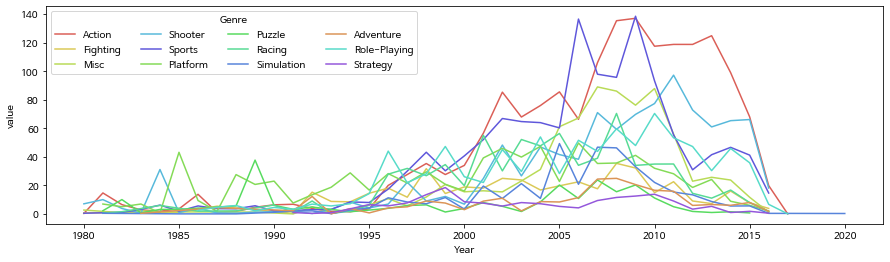

In [377]:
plt.figure(figsize=(15,4))
ax = sns.lineplot(x = 'Year', y = 'value',hue = 'Genre',  palette=dict_color,  data = df_yeargenre_tmp)

ax.legend(loc='upper left',ncol=4, title="Genre")

In [378]:
wide_yeargenre_tmp = df_yeargenre_tmp.pivot_table(index = 'Year', columns = 'Genre', values = 'value')
wide_yeargenre_tmp.fillna(0, inplace=True)

from scipy.stats import chi2_contingency

# 귀무가설 : 출시년도와 장르별 판매량은 관련성이 있다
# 대안가설 : 출시년도와 장르별 판매량은 관련성이 있다

chi2_val, p, dof, expected= chi2_contingency(wide_yeargenre_tmp, correction=False)


if(p<0.05) : 
    print('p value :', p,"\n"+'대안가설 채택. 출시년도와 장르별 판매량은 관련성이 있다')
else :
    print('p value :', p,"\n"+'귀무가설 채택. 출시년도와 장르별 판매량은 관련성이 없다')


# 따라서 출시년도 별 장르, 플랫폼의 트렌드가 있다.

p value : 0.0 
대안가설 채택. 출시년도와 장르별 판매량은 관련성이 있다


In [379]:
# # gif 생성 (참고용)
# import pandas_alive
# import IPython
# from IPython.display import Image

# tmp = wide_yeargenre_tmp.plot_animated(filename='example-pie-chart.gif',kind="pie",period_fmt="%Y", rotatelabels=True, interpolate_period=False)
# Image(filename='example-pie-chart.gif')

In [380]:
df_rank = wide2rank(wide_yeargenre_tmp)

color = (sns.color_palette('hls', int(len(wide_yeargenre_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_yeargenre_tmp.columns, color[:len(wide_yeargenre_tmp.columns)]))

def highlight_cols(cell_value):

    if cell_value == '-':
        return ''

    highlight = 'background-color: ' + dict_color[cell_value]
    return highlight


df_rank.style.set_properties(**{'background-color': 'gray',
                           'color': 'black'}).applymap(highlight_cols)

,~80,81~85,86~90,91~95,96~00,01~05,06~10,11~15,16~20
1st,Shooter,Platform,Platform,Platform,Role-Playing,Action,Action,Action,Action
2nd,Misc,Shooter,Puzzle,Fighting,Sports,Sports,Sports,Shooter,Shooter
3rd,Fighting,Action,Action,Role-Playing,Action,Racing,Misc,Sports,Sports
4th,Sports,Puzzle,Sports,Sports,Racing,Platform,Shooter,Role-Playing,Role-Playing
5th,Action,Sports,Role-Playing,Adventure,Platform,Shooter,Role-Playing,Misc,Fighting


In [381]:
# 장르별 트랜드
# ~1980     : 슈팅
# 1981~1985 : 플래포머
# 1986~1990 : 플랫포머
# 1991~1995 : 플랫포머
# 1996~2000 : 롤플레잉
# 2001~2005 : 액션
# 2006~2010 : 액션
# 2011~2015 : 액션
# 2016~2020 : 액션

In [382]:
df['Entire_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [383]:
# 출고량의 높은 게임에 대한 분석 및 시각화 프로세스 가 포함되어야 합니다
# 각 지역별 출고량이 높은 5개의 게임들에 대하여 분석
# 먼저 플랫폼별 나눠져있는 데이터를 그룹핑

df_NA = df.groupby(['Name']).sum().sort_values(by=["NA_Sales"], ascending=[False]).reset_index()
df_EU = df.groupby(['Name']).sum().sort_values(by=["EU_Sales"], ascending=[False]).reset_index()
df_JP = df.groupby(['Name']).sum().sort_values(by=["JP_Sales"], ascending=[False]).reset_index()
df_Ot = df.groupby(['Name']).sum().sort_values(by=["Other_Sales"], ascending=[False]).reset_index()
df_Et = df.groupby(['Name']).sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index()

df_Et.head(10)

,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
0,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74
1,Grand Theft Auto V,10069,23.46,23.04,1.39,8.03,55.92
2,Super Mario Bros.,3984,32.48,4.88,6.96,0.99,45.31
3,Tetris,3977,26.17,2.95,6.03,0.69,35.84
4,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.83
5,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00
6,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.38
7,Call of Duty: Modern Warfare 3,8044,15.58,11.29,0.62,3.35,30.84
8,New Super Mario Bros.,2006,11.38,9.23,6.50,2.90,30.01
9,Call of Duty: Black Ops II,8048,14.08,11.05,0.72,3.88,29.73


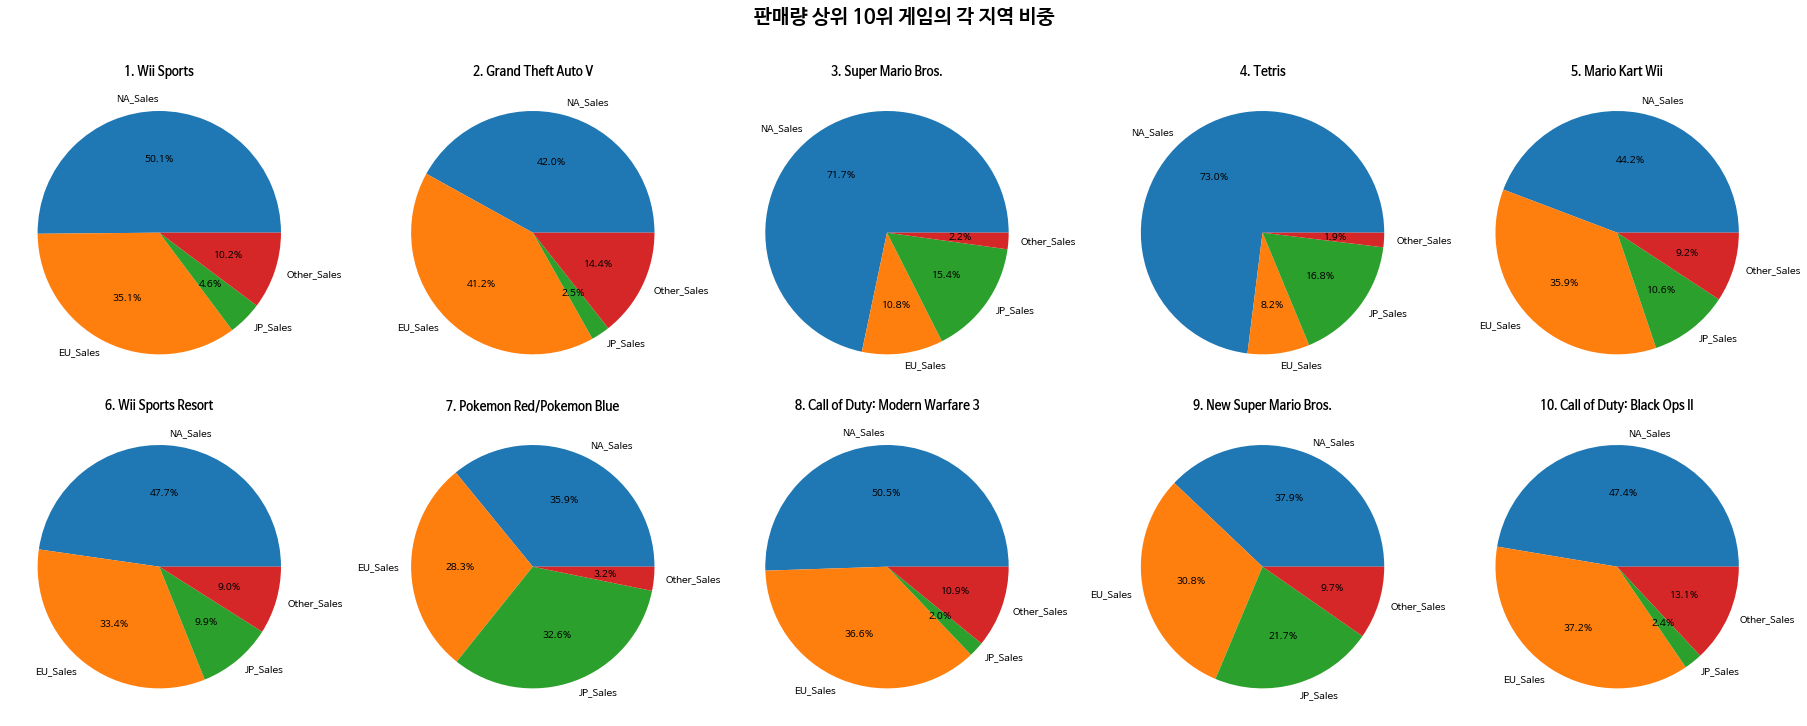

In [384]:
fig,ax=plt.subplots(2,5, figsize=(25,10), constrained_layout=True)


for j in range(2):
  for i in range(5):
  
    tmp = ax[j,i].pie(df_Et.iloc[j*5+i, 2:6], labels=df_Et.columns[2:6], autopct='%.1f%%')
    tmp = ax[j,i].set_title( str(j*5+i+1) + '. ' + str(df_Et.iloc[j*5+i,0]), fontweight ="bold")

tmp = fig.suptitle('판매량 상위 10위 게임의 각 지역 비중\n', fontsize=20, fontweight ="bold")


plt.show()

In [385]:
# 전세계 판매량 상위 10위 게임들의 지역별 판매 비중
# 대부분 북미와 유럽의 비중이 높다. 특히 북미

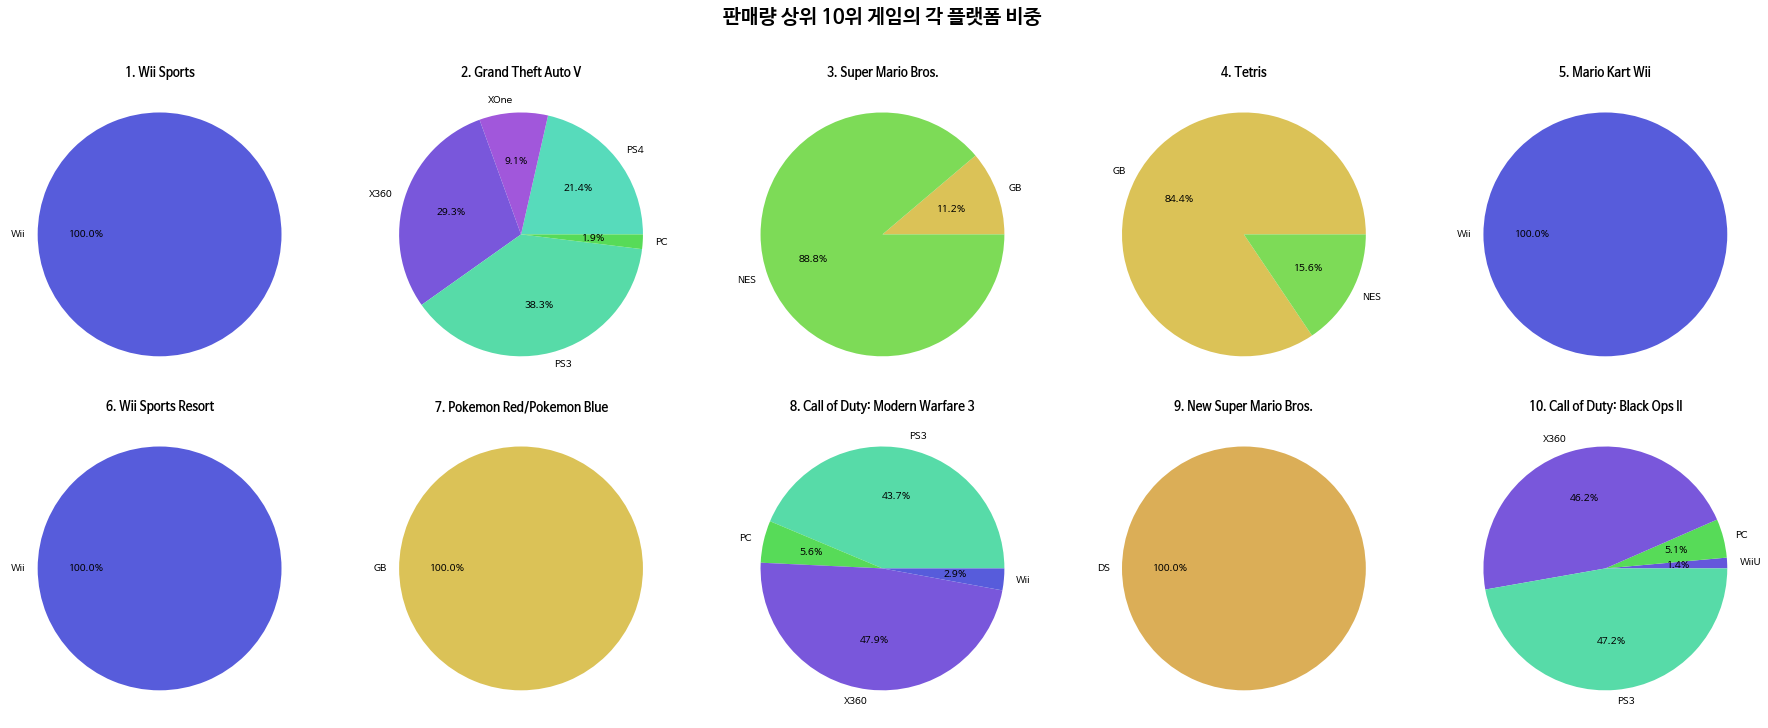

In [386]:

color = (sns.color_palette('hls', int(len(wide_yearplat_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_yearplat_tmp.columns, color[:len(wide_yearplat_tmp.columns)]))


#dict_color
fig,ax=plt.subplots(2,5, figsize=(25,10), constrained_layout=True)


for j in range(2):
  for i in range(5):
  
    plaforms_sale = []
    plaforms_name = []
    
    for z in range(len(df[df['Name'] == df_Et.loc[j*5+i, 'Name']])):
  
      plaforms_sale.append(df[df['Name'] == df_Et.loc[j*5+i, 'Name']].iloc[z, -1])
      plaforms_name.append(df[df['Name'] == df_Et.loc[j*5+i, 'Name']].iloc[z, 1])
    
    tmp = ax[j,i].pie(plaforms_sale, labels=plaforms_name, colors = [dict_color[key] for key in plaforms_name] , autopct='%.1f%%')
    tmp = ax[j,i].set_title( str(j*5+i+1) + '. ' + str(df_Et.iloc[j*5+i,0]), fontweight ="bold")
  
tmp = fig.suptitle('판매량 상위 10위 게임의 각 플랫폼 비중\n', fontsize=20, fontweight ="bold")

#plt.tight_layout()
plt.show()

In [387]:
# 전세계 판매량 10위 게임들의 플랫폼 비중이다.
# 해당 그래프에선 특별한 인사이트를 얻을 순 없었다.

In [388]:
#df_Et50 = df_Et[:50]

df_Et = df[df['Year'] > 2015].groupby(['Name']).sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index()
df_Et50 = df_Et[:50]
#df_Et.head(10)

df = df[df['Year'] > 2015]

#df_Et10['Genre'] = df[]

tmp = []
for i in range(len(df_Et50)):
  tmp.append(df[df['Name'] == df_Et50.loc[i, 'Name']].iloc[0, 3])

df_Et50['Genre'] = np.array(tmp)
# #df['Genre'].unique().tolist()

df_tmp = pd.DataFrame()

for i in range(len(df_Et50)):
  df_tmp = pd.concat([df_tmp, df[df['Name'] == df_Et50.loc[i, 'Name']]])

#df_Et50
#df_tmp
df_tmp2 = df_Et50.groupby('Genre').sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index()
df_tmp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
0,Shooter,40320,7.19,7.47,0.60,2.35,17.61
1,Action,82656,5.32,5.52,3.88,1.65,16.37
2,Sports,56448,4.53,7.17,0.70,1.89,14.29
3,Role-Playing,30240,1.08,0.89,2.22,0.35,4.54
4,Fighting,16128,1.53,1.12,0.48,0.44,3.57
5,Platform,8064,0.51,0.86,0.06,0.27,1.70
6,Racing,14112,0.23,0.85,0.01,0.14,1.23
7,Adventure,6048,0.23,0.20,0.03,0.07,0.53
8,Misc,2016,0.18,0.09,0.14,0.03,0.44


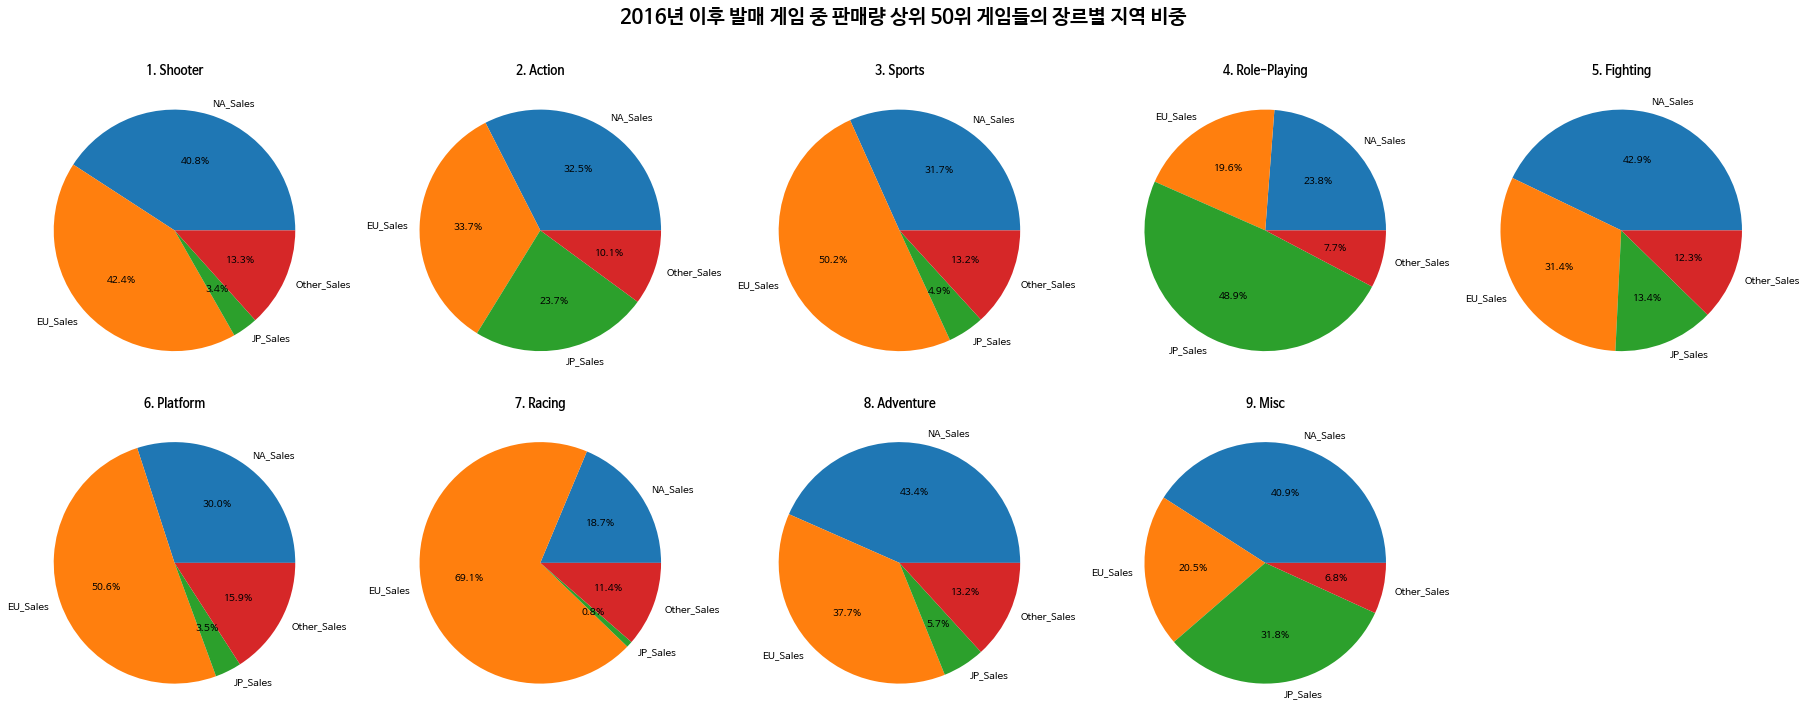

In [389]:
fig,ax=plt.subplots(2,5, figsize=(25,10), constrained_layout=True)

for j in range(2):
  for i in range(5):
    
    if (j*5+i) >= len(df_tmp2):
      fig.delaxes( ax[j, i])
      break
    #df_tmp2.iloc[j*5+i, 2:6]
    tmp = ax[j, i].pie(df_tmp2.iloc[j*5+i, 2:6]*100, labels=df_tmp2.columns[2:6], autopct='%.1f%%')
    tmp = ax[j, i].set_title( str(j*5+i+1) + '. ' + str(df_tmp2.iloc[j*5+i,0]), fontweight ="bold")

tmp = fig.suptitle('2016년 이후 발매 게임 중 판매량 상위 50위 게임들의 장르별 지역 비중\n', fontsize=20, fontweight ="bold")
#plt.subplots_adjust(top=0.85)
#plt.tight_layout()
plt.show()

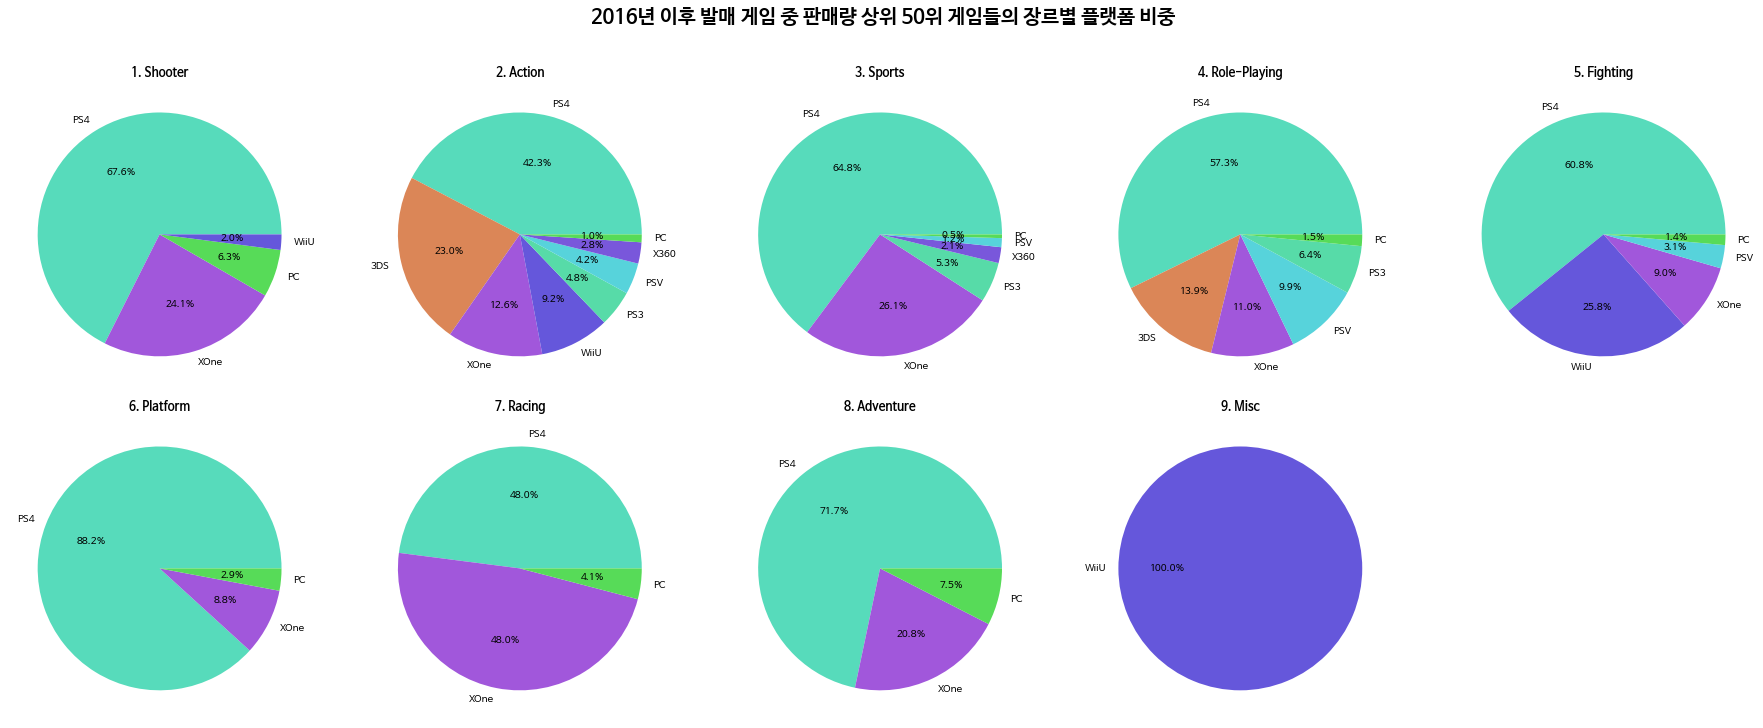

In [390]:
color = (sns.color_palette('hls', int(len(wide_yearplat_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_yearplat_tmp.columns, color[:len(wide_yearplat_tmp.columns)]))


df_tmp3 = df_tmp.groupby(['Platform','Genre']).sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index()
df_tmp4 = df_tmp3.groupby(['Genre']).sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index()
fig,ax=plt.subplots(2,5, figsize=(25,10), constrained_layout=True)

for j in range(2):
  for i in range(5):
    
    if (j*5+i) >= len(df_tmp4['Genre'].unique().tolist()):
      fig.delaxes( ax[j, i])
      break

    gen = df_tmp4['Genre'].unique().tolist()[j*5+i]

    plaforms_sale = []
    plaforms_name = []

    #df_tmp3[df_tmp3['Genre'] == gen]
    for z in range(len(df_tmp3[df_tmp3['Genre'] == gen])):
      
      plaforms_sale.append((df_tmp3[df_tmp3['Genre'] == gen].iloc[z, -1])*100)
      plaforms_name.append(df_tmp3[df_tmp3['Genre'] == gen].iloc[z, 0])
    
    #plaforms_name
    tmp = ax[j, i].pie(plaforms_sale , labels=plaforms_name, colors = [dict_color[key] for key in plaforms_name] , autopct='%.1f%%')
    tmp = ax[j, i].set_title( str(j*5+i+1) + '. ' + str(gen), fontweight ="bold")


  #df_tmp3[df_tmp3['Genre'] == gen]
tmp = fig.suptitle('2016년 이후 발매 게임 중 판매량 상위 50위 게임들의 장르별 플랫폼 비중\n', fontsize=20, fontweight ="bold")
plt.show()

#df[df'']

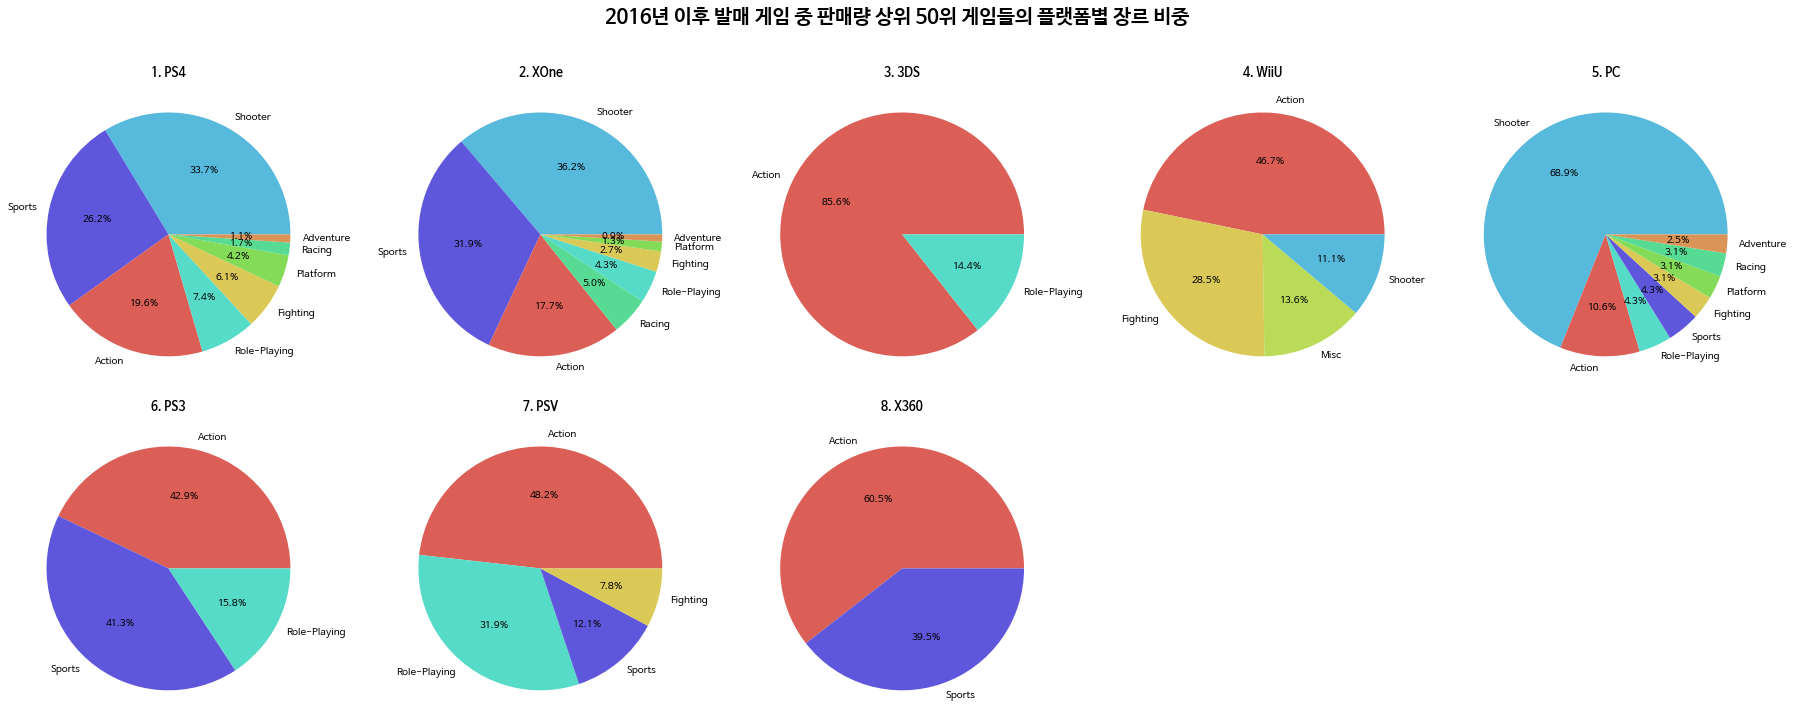

In [409]:
color = (sns.color_palette('hls', int(len(wide_yeargenre_tmp.columns)*1.3)).as_hex())
dict_color = dict(zip(wide_yeargenre_tmp.columns, color[:len(wide_yeargenre_tmp.columns)]))

fig,ax=plt.subplots(2,5, figsize=(25,10), constrained_layout=True)

for j in range(2):
  for i in range(5):
        
    if (j*5+i) >= len(df_tmp3['Platform'].unique()):
      fig.delaxes( ax[j, i])
      continue
    
    cur_plat = df_tmp3['Platform'].unique().tolist()[j*5+i]
    df_tmp6 = df_tmp3[df_tmp3['Platform'] == cur_plat].groupby(['Genre']).sum().sort_values(by=["Entire_Sales"], ascending=[False]).reset_index().T

    tmp = ax[j, i].pie((df_tmp6.loc['Entire_Sales', :])*100, labels=df_tmp6.loc['Genre', :], colors = [dict_color[key] for key in df_tmp6.loc['Genre', :]], autopct='%.1f%%')
    tmp = ax[j, i].set_title( str(j*5+i+1) + '. ' + str(cur_plat), fontweight ="bold")

tmp = fig.suptitle('2016년 이후 발매 게임 중 판매량 상위 50위 게임들의 플랫폼별 장르 비중\n', fontsize=20, fontweight ="bold")
#plt.subplots_adjust(top=0.85)
#plt.tight_layout()}
plt.show()